<a href="https://colab.research.google.com/github/stokljos/Earthquake-Plotting/blob/master/Project_3_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap

Get data file from Github

In [0]:
url = 'https://raw.githubusercontent.com/stokljos/Earthquake-Plotting/master/query.csv'

Convert Data from csv to dataframe

In [0]:
df = pd.read_csv(url)
longitude = df['longitude']
latitude = df['latitude']
mag = df['mag']
time = pd.to_datetime(df['time'])


Plots Map with Earthquakes

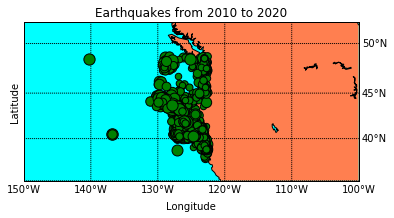

In [61]:
my_map = Basemap(projection='merc', lat_0=42, lon_0=-140,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-150, llcrnrlat=35,
    urcrnrlon=-100, urcrnrlat=52)
my_map.drawcoastlines()
my_map.drawmapboundary(fill_color='aqua')
my_map.fillcontinents(color='coral',lake_color='aqua')
meridians = np.arange(0, 360, 10)
my_map.drawmeridians(meridians,labels=[True,False,False,True])
parallels = np.arange(-90, 90, 5)
my_map.drawparallels(parallels,labels=[False,True,True,False])


minSize = 2.5
for lo, la, m in zip(longitude, latitude, mag):
  x,y = my_map(lo, la)
  msize = m*minSize
  my_map.plot(x, y, 'go',markeredgecolor='black', markersize=msize)

plt.xlabel('Longitude',labelpad=20)
plt.ylabel('Latitude')
plt.title('Earthquakes from 2010 to 2020')
plt.show()

Plots the year vs magnitude of the earthquake

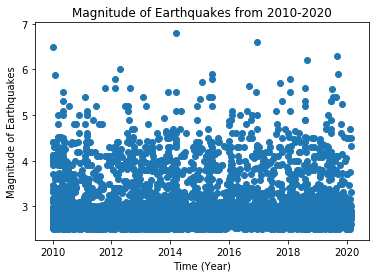

In [64]:
plt.scatter(time, mag)
plt.xlabel('Time (Year)')
plt.ylabel('Magnitude of Earthquakes')
plt.title('Magnitude of Earthquakes from 2010-2020')
plt.show()